In [1]:
import numpy as np
import matplotlib.pyplot  as plt
import math 

In [2]:
x = np.genfromtxt('trajectory_file')#, dtype= None, delimiter= None)
# print(type(x))

In [3]:
# calculando histograma

def hist_dx(x, dx, dt=1):
    hist, bin_edges = np.histogram(x, bins=np.arange(min(x), max(x) + dx, dx)) # 'bins' são os valores e 'hist' é quantidade de vezes que eles aparecem
    dist_den = hist / (dt * dx) # normalização do histograma onde o valor em cada bin representa uma densidade e não uma contagem
    bins = bin_edges[:-1]
    # hist_dx = dict(zip(bins, dist_den)) 
    hist_dx = bins, dist_den # transformar em lista 
    
    return hist_dx

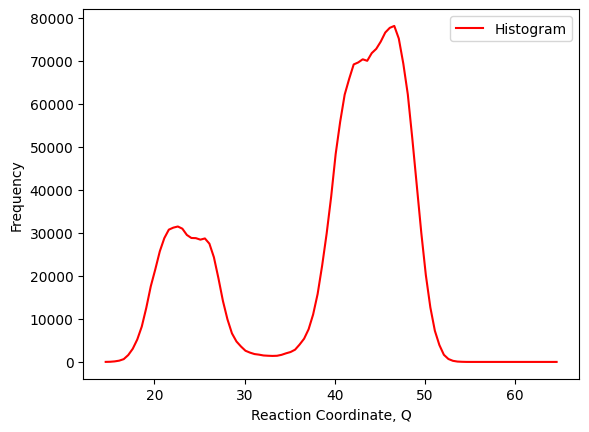

In [5]:
fig, ax = plt.subplots()
ax.plot(bins, density, color='red', label = 'Histogram')
plt.xlabel('Reaction Coordinate, Q')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [4]:
value = hist_dx(x, 0.5)

bins = value[0]
density = value[1]

# print(bins, density)

In [17]:
v = np.zeros((3,2))

print(v[0])

[0. 0.]


In [22]:
def hist_tpx(x, x0, x1, dx):

    hist_zh = hist_dx(x, dx)
    # states = {} # states recebe os valores dentro do intervalo e seu respectivo estado 
    tpx = [] # valores dentro dos intervalos escolhidos 
    
    s = 2 # estado incial 

    if x0 > x1:
        x0, x1 = x1, x0

    def state(tpx):
        dim = len(tpx)
        v = np.zeros((dim, 2))
        bins=np.arange(min(tpx), max(tpx) + dx, dx)
        # print(bins)
        for l in bins:
            if l in v:
                v[l]+1
            else:
                v = l
        print(v)
        
    for val in x:
        tpx.append(val)

        if s == 2:
            if val <= x0:
                s = 0
            elif val >= x1:
                s = 1

        if val <= x0:
            if s == 1:
                state(tpx)
            s = 0
            tpx = []

        elif val >= x1:
            if s == 0:
                state(tpx)
            s = 1
            tpx = []
    ptpx = []
    # for val in hist_zh:
    #     transition_prob = float(states.get(val, 0)) / (dx * hist_zh[val]) if hist_zh[val] > 0 else 0
    #     ptpx.append((val, transition_prob))

    # ptpx.sort()
    return hist_zh

# Load data from file
x = np.genfromtxt('trajectory_file')

# Parameters
x0 = 30
x1 = 37
dx = 0.5  # Ideal range: 0.1 to 0.5

# Compute results
ptpx_result = hist_tpx(x, x0, x1, dx)
# hist_result = compZh_np(x, dx, dt=1)

# Example output
# print("Histogram (zheq):", zheq_result)
# print("Transition probabilities (ptpx):", ptpx_result)
# print(hist_result)

print(ptpx_result)

TypeError: argument of type 'numpy.float64' is not iterable

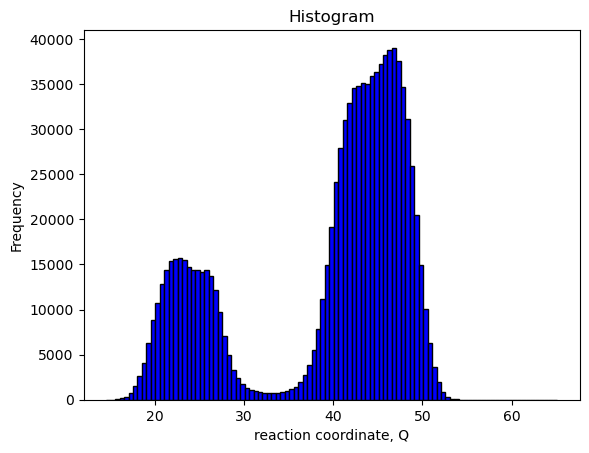

In [6]:
plt.hist(x, bins=np.arange(min(x), max(x) + dx, dx), color='blue', edgecolor='black')
plt.xlabel('reaction coordinate, Q')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

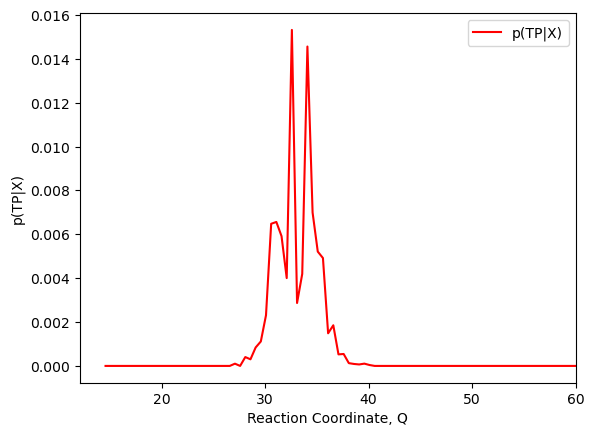

In [7]:
x, y = zip(*ptpx_result) 
fig, ax = plt.subplots()
ax.plot(x, y, color='red', label = 'p(TP|X)')
plt.xlabel('Reaction Coordinate, Q')
plt.ylabel('p(TP|X)')
plt.xlim([None, 60])
plt.ylim([None, None])
plt.legend()
plt.show()

In [7]:
# # Calcula o p(TP|X)

# import numpy as np

# def ptpx(x, x0, x1):
    
#     ptpx = []
#     Q = []
    
#     # Garante que x0 seja menor que x1
#     if x0 > x1:
#         x0, x1 = x1, x0
        
#     for i in x:
#         if x0 <= i <= x1:
#             Q.append(x)
            
#     return ptpx

# # teste da função
# x0 = 30
# x1 = 37
# # dx = 0.5

# result = ptpx(x, x0, x1)
# print(result)

# # np.savetxt('TPX.txt', result, fmt='%5.4f')

# # return np.round(x, 1)

MemoryError: Unable to allocate 119. GiB for an array with shape (15924, 1000000) and data type float64